## Introduction

The aim of this project is to analyze data of gdp and life expectancy values for a number of countries over several years through their graphical representation and to make some conclusions about the possible relationship between these two indicators.

First, let’s import the modules that will be used in the next steps, upload the data file and have a look at the data structure.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('Life-Expectancy-and-GDP-Starter/all_data.csv')

print(df.head())
print(df.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


We have __4 variables__ (`Country`, `Year`, `Life expectancy at birth (years)` and `GDP`) and __96 observations__. It makes sense to rename the variable `Life expectancy at birth (years)` so that it is not so long and does not contain spaces. This will make the coding process more convenient and the lines of code will be shorter.

In [2]:
df.rename(columns={'Life expectancy at birth (years)': 'LE'}, inplace=True)

Let's find out how many countries for how many years are present in the data. The data for each country will be stored as a separate dataframe, years will be stored in the variable `years` - this will also make the code more convenient and easy to read when we do the analysis in the next steps.

In [3]:
print(df['Country'].unique())

years=df['Year'].unique()
print(years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [4]:
chile = df[df['Country'] == 'Chile'].reset_index(drop=True)
china = df[df['Country'] == 'China'].reset_index(drop=True)
germany = df[df['Country'] == 'Germany'].reset_index(drop=True)
mexico = df[df['Country'] == 'Mexico'].reset_index(drop=True)
usa = df[df['Country'] == 'United States of America'].reset_index(drop=True)
zimbabwe = df[df['Country'] == 'Zimbabwe'].reset_index(drop=True)

We have the data on GDP and life expectancy values for __6 countries__ (`Chile`, `China`, `Germany`, `Mexico`, `United States of America` and `Zimbabwe`) for __16 years__ (2000-2015). We are ready to start visualizing this.

## Data Analysis

The first plot we will create is a line graph that shows the comparison of GDP values between the countries from 2000 to 2015.

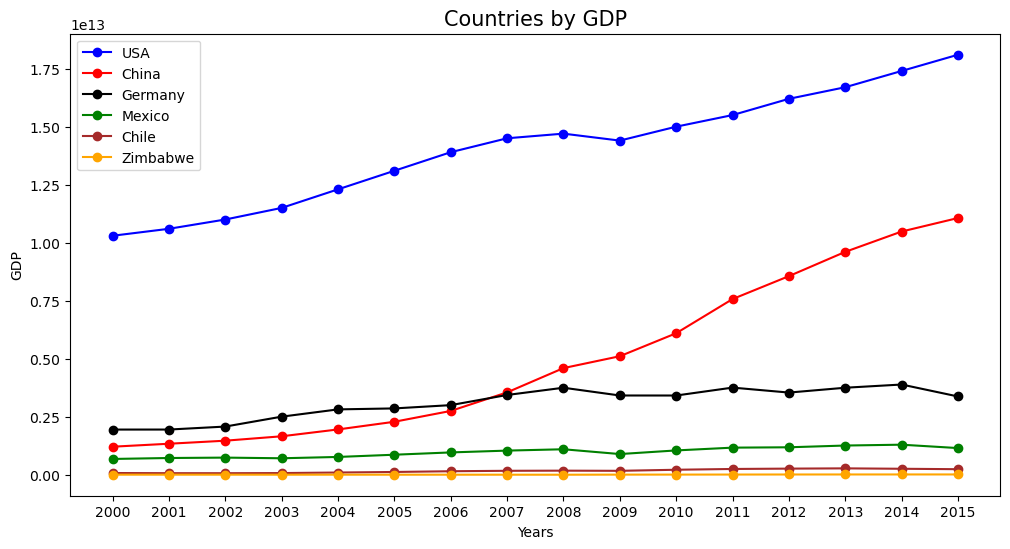

In [5]:
plt.figure(figsize=(12, 6))
ax = plt.subplot()
plt.plot('Year','GDP', data=usa, marker='o', color='blue', label='USA')
plt.plot('Year','GDP', data=china, marker='o', color='red', label='China')
plt.plot('Year','GDP', data=germany, marker='o', color='black', label='Germany')
plt.plot('Year','GDP', data=mexico, marker='o', color='green', label='Mexico')
plt.plot('Year','GDP', data=chile, marker='o', color='brown', label='Chile')
plt.plot('Year','GDP', data=zimbabwe, marker='o', color='orange', label='Zimbabwe')
ax.legend()
ax.set_xticks(years)
plt.title('Countries by GDP', fontsize=15)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.show()

As we can see, USA has the highest value of GDP in each year and is far ahead of other countries. At the same time, there is a positive trend for China: GDP for this country is growing fast. Starting from 2007, this country is top 2 among the countries presented and can pretend to be close or even above USA in the future. Germany is top 3. The lines for Mexico, Chile and Zimbabwe are at the bottom of the graph.

Let's plot the same graph for the life expectancy value.

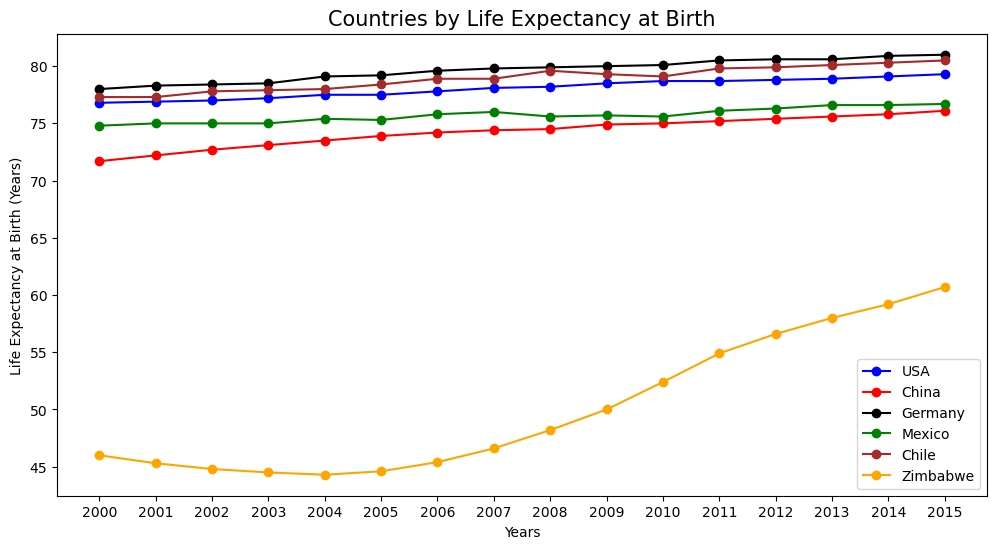

In [6]:
plt.figure(figsize=(12, 6))
ax = plt.subplot()
plt.plot('Year','LE', data=usa, marker='o', color='blue', label='USA')
plt.plot('Year','LE', data=china, marker='o', color='red', label='China')
plt.plot('Year','LE', data=germany, marker='o', color='black', label='Germany')
plt.plot('Year','LE', data=mexico, marker='o', color='green', label='Mexico')
plt.plot('Year','LE', data=chile, marker='o', color='brown', label='Chile')
plt.plot('Year','LE', data=zimbabwe, marker='o', color='orange', label='Zimbabwe')
ax.legend()
ax.set_xticks(years)
plt.title('Countries by Life Expectancy at Birth', fontsize=15)
plt.xlabel('Years')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()

The picture is not the same compared to the first graph. Here 5 out of 6 countries have very close values (approximately between 70 and 80) despite the big difference in the GDP. The country that has the lowest GDP has at the same time the lowest life expectancy (Zimbabwe). But on the other hand, the "richest" countries (if we suppose the GDP is a good indicator to define how rich or how poor the country is) do not have the highest predicted life length: e.g. the lines for Germany and Chile are above the line for USA and the line for China is below all three of them and below Mexico.

While these two graphs are good for comparing countries overall, they are not very effective for tracking dynamics because the countries "outliers" make the scale so large that small changes in other countries become barely visible. This is primarily true for the first graph, where the difference in GDP between countries is enormous.

To analyze the dynamics, let's create two subplots with bar graphs for gdp and life expectancy for each country separately. The color of each bar will show the dynamics in relation to the previous year - <font color=green>green</font> means that the value became higher, <font color=orange>yellow</font> - the value remained the same, <font color=red>red</font> - the value became lower. In this way we evaluate the progress in each year. It should also be noted that the scale for GDP will be different for each country, while we can let the scale for life expectancy be the same among all countries.

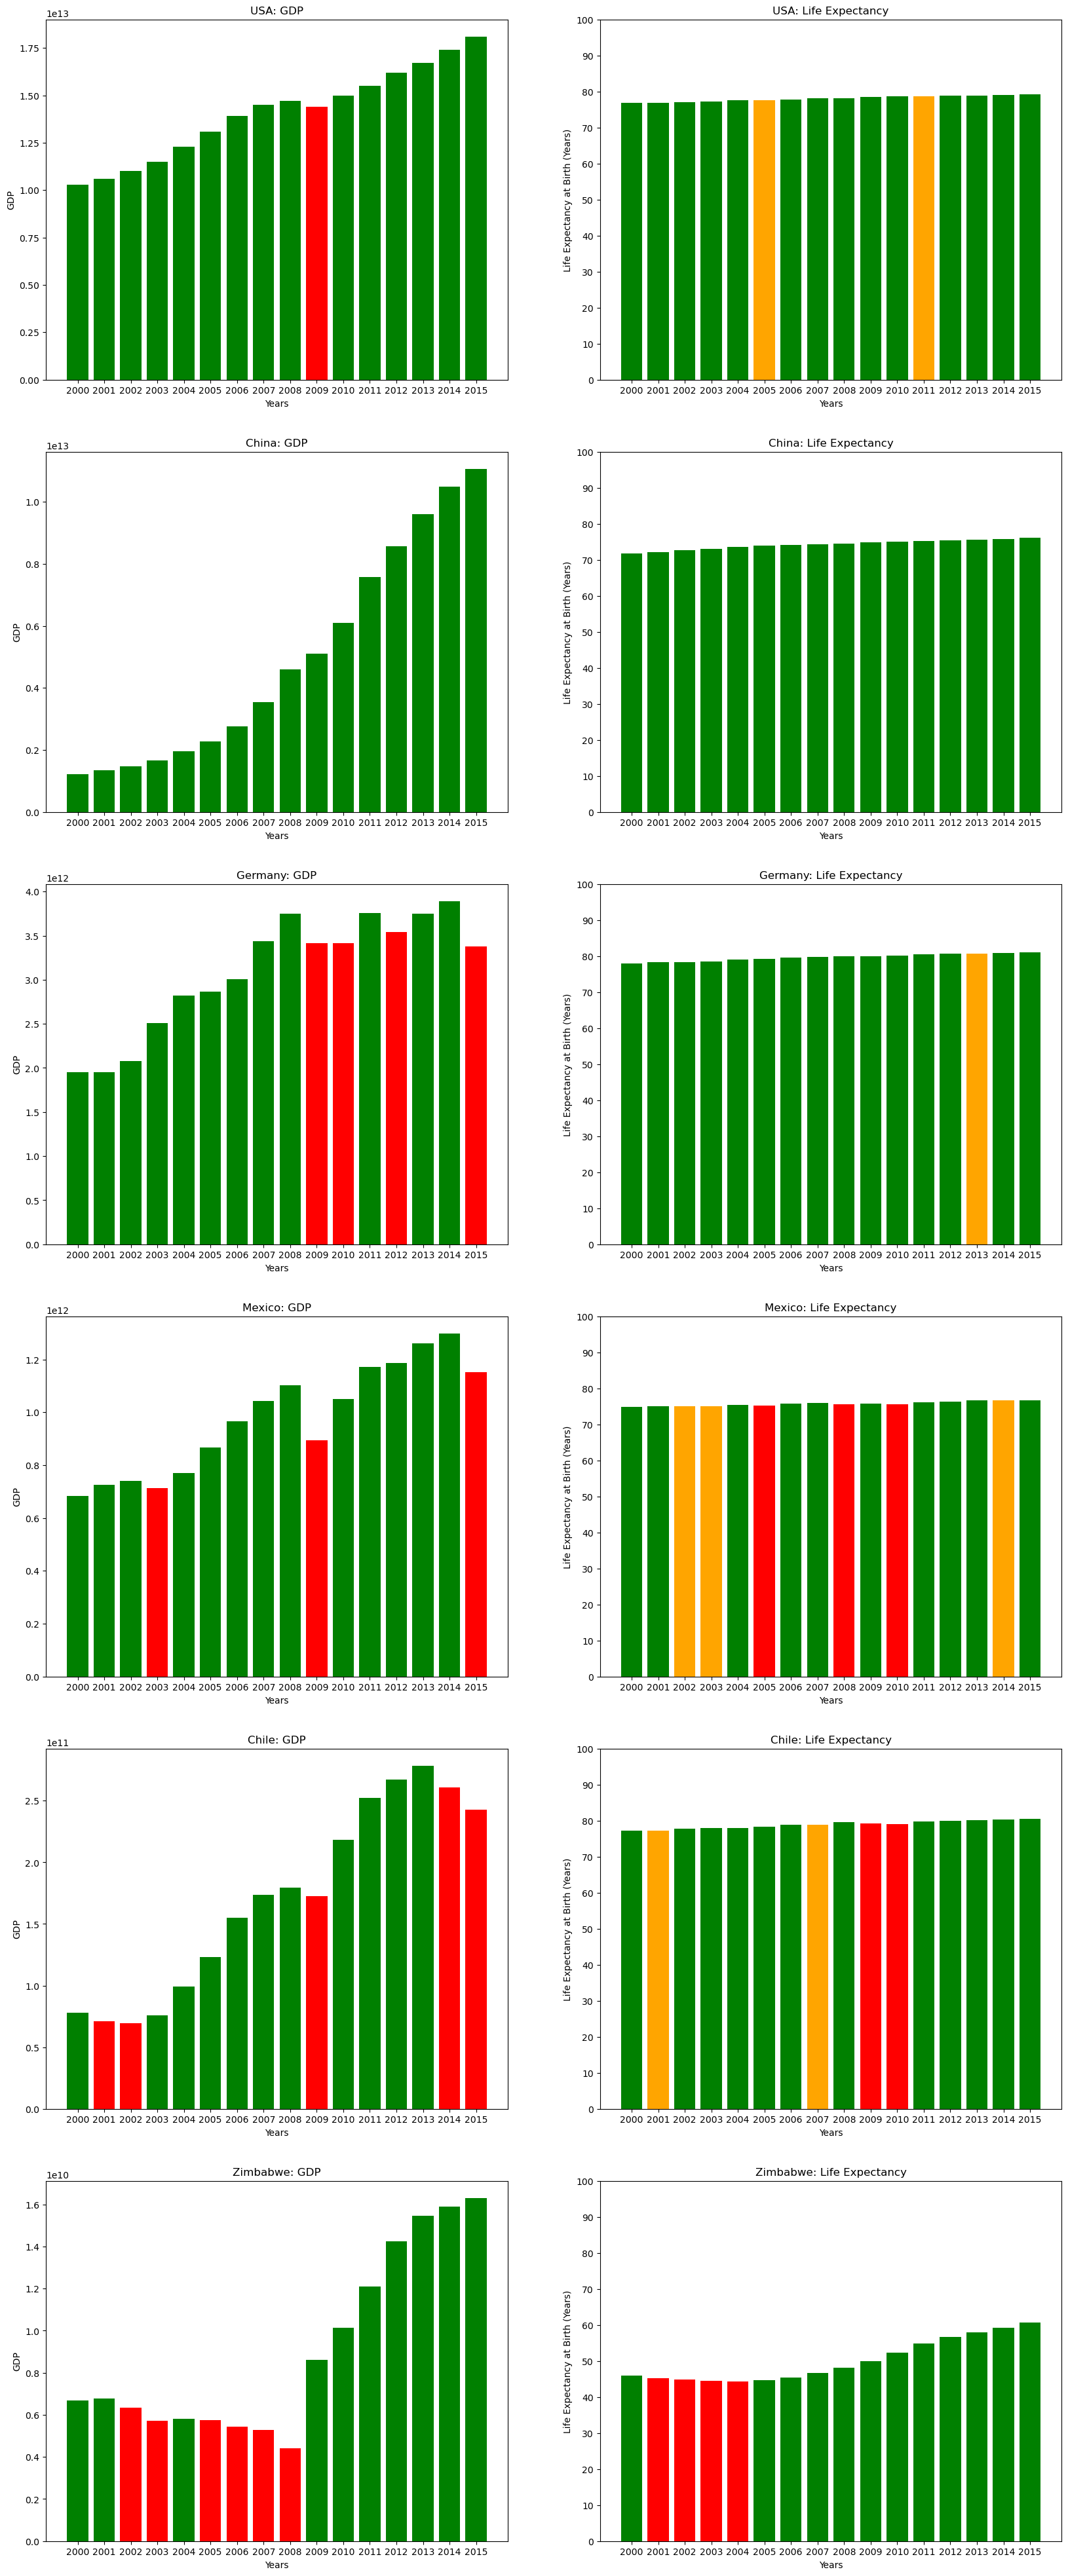

In [7]:
#Color setup
def def_color(values):
    colors = []
    for i in range(len(years)):
        if i == 0:
            colors.append('green')
        else:
            if values[i] > values[i-1]:
                colors.append('green')
            elif values[i] == values[i-1]:
                colors.append('orange')
            else:
                colors.append('red')
    return colors

colors_gdp_usa = def_color(usa['GDP'])
colors_gdp_china = def_color(china['GDP'])
colors_gdp_germany = def_color(germany['GDP'])
colors_gdp_mexico = def_color(mexico['GDP'])
colors_gdp_chile = def_color(chile['GDP'])
colors_gdp_zimbabwe = def_color(zimbabwe['GDP'])

colors_le_usa = def_color(usa['LE'])
colors_le_china = def_color(china['LE'])
colors_le_germany = def_color(germany['LE'])
colors_le_mexico = def_color(mexico['LE'])
colors_le_chile = def_color(chile['LE'])
colors_le_zimbabwe = def_color(zimbabwe['LE'])

#Create a long figure with two graphs per country in each row
plt.figure(figsize=(20,50))

#Two graphs for USA
plt.subplot(6,2,1) #GDP
plt.bar(usa['Year'], usa['GDP'], color=colors_gdp_usa)
plt.title('USA: GDP')
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('GDP')

plt.subplot(6,2,2) #Life Expectancy
plt.bar(usa['Year'], usa['LE'], color=colors_le_usa)
plt.title('USA: Life Expectancy')
plt.xticks(years)
plt.yticks(range(0,101,10))
plt.xlabel('Years')
plt.ylabel('Life Expectancy at Birth (Years)')

#Two graphs for China
plt.subplot(6,2,3) #GDP
plt.bar(china['Year'], china['GDP'], color=colors_gdp_china)
plt.title('China: GDP')
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('GDP')

plt.subplot(6,2,4) #Life Expectancy
plt.bar(china['Year'], china['LE'], color=colors_le_china)
plt.title('China: Life Expectancy')
plt.xticks(years)
plt.yticks(range(0,101,10))
plt.xlabel('Years')
plt.ylabel('Life Expectancy at Birth (Years)')

#Two graphs for Germany
plt.subplot(6,2,5) #GDP
plt.bar(germany['Year'], germany['GDP'], color=colors_gdp_germany)
plt.title('Germany: GDP')
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('GDP')

plt.subplot(6,2,6) #Life Expectancy
plt.bar(germany['Year'], germany['LE'], color=colors_le_germany)
plt.title('Germany: Life Expectancy')
plt.xticks(years)
plt.yticks(range(0,101,10))
plt.xlabel('Years')
plt.ylabel('Life Expectancy at Birth (Years)')

#Two graphs for Mexico
plt.subplot(6,2,7) #GDP
plt.bar(mexico['Year'], mexico['GDP'], color=colors_gdp_mexico)
plt.title('Mexico: GDP')
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('GDP')

plt.subplot(6,2,8) #Life Expectancy
plt.bar(mexico['Year'], mexico['LE'], color=colors_le_mexico)
plt.title('Mexico: Life Expectancy')
plt.xticks(years)
plt.yticks(range(0,101,10))
plt.xlabel('Years')
plt.ylabel('Life Expectancy at Birth (Years)')

#Two graphs for Chile
plt.subplot(6,2,9) #GDP
plt.bar(chile['Year'], chile['GDP'], color=colors_gdp_chile)
plt.title('Chile: GDP')
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('GDP')

plt.subplot(6,2,10) #Life Expectancy
plt.bar(chile['Year'], chile['LE'], color=colors_le_chile)
plt.title('Chile: Life Expectancy')
plt.xticks(years)
plt.yticks(range(0,101,10))
plt.xlabel('Years')
plt.ylabel('Life Expectancy at Birth (Years)')

#Two graphs for Zimbabwe
plt.subplot(6,2,11) #GDP
plt.bar(zimbabwe['Year'], zimbabwe['GDP'], color=colors_gdp_zimbabwe)
plt.title('Zimbabwe: GDP')
plt.xticks(years)
plt.xlabel('Years')
plt.ylabel('GDP')

plt.subplot(6,2,12) #Life Expectancy
plt.bar(zimbabwe['Year'], zimbabwe['LE'], color=colors_le_zimbabwe)
plt.title('Zimbabwe: Life Expectancy')
plt.xticks(years)
plt.yticks(range(0,101,10))
plt.xlabel('Years')
plt.ylabel('Life Expectancy at Birth (Years)')

plt.show()

China has never had negative results in these two indicators compared to the previous year. 2009 (just after the financial crisis began) was a difficult year for 4 countries: USA, Germany, Mexico and Chile had a negative trend. 2015 was negative for 3 countries.

It's important to note that in these graphs we do not see a direct correlation between changes in gdp and changes in life expectancy value. In developed countries such as USA and Germany, although GDP has fallen in certain years, the value of life expectancy has never become lower. There is a possibility that the direct effect of GDP on life expectancy is more present in developing countries (and if so, with some time delay), but this cannot be confirmed with certainty just by comparing these graphs.

Let's create a scatterplot to look at the relationship between these two quantitative variables.

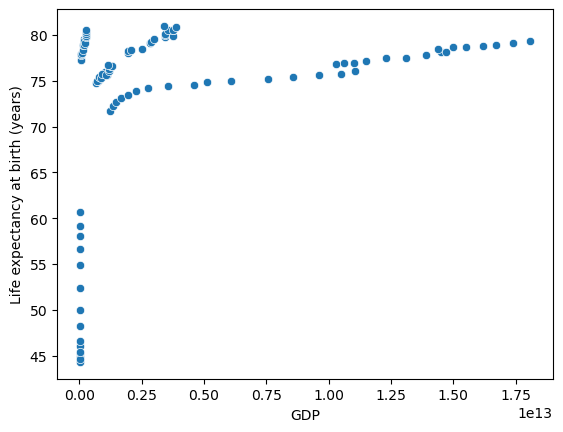

In [8]:
sns.scatterplot(y=df['LE'], x=df['GDP'])
plt.ylabel('Life expectancy at birth (years)')
plt.show()

At the global level, it is very difficult to speak of a linear relationship "the higher - the higher": there are the cases with high life expectancy but low GDP (upper left area of the graph). 

Let's add information to the chart by color-coding the points depending on the country.

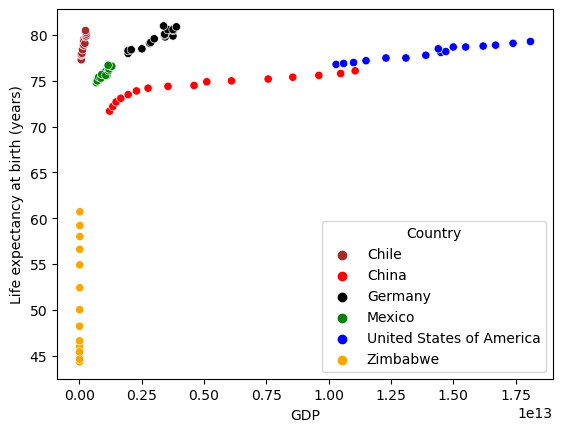

In [9]:
# Create a scatterplot of the life expectancy variable relative to GDP
palette={'United States of America':'blue', 'China':'red', 'Germany':'black', 'Mexico':'green', 'Chile':'brown', 'Zimbabwe':'orange'}
sns.scatterplot(y=df['LE'], x=df['GDP'], hue=df['Country'], palette=palette)
plt.ylabel('Life expectancy at birth (years)')
plt.show()

We see that the data on different countries are not distributed on the graph in a mixed manner, but form clearly distinguishable clusters. The points for developing countries are clumped together, while the dots for more developed countries are somewhat spread out - this is due to difference in GDP growth rates. The horizontality of the distribution of points for the US and China tells us that while there is a big change in GDP (and we know from the previous chart that this is growth), we do not see changes of the same extent in predicted life expectancy.

Since we have already presented the values of GDP and life expectancy for each country separately, it makes sense to do the same when analyzing the correlation between these two parameters.

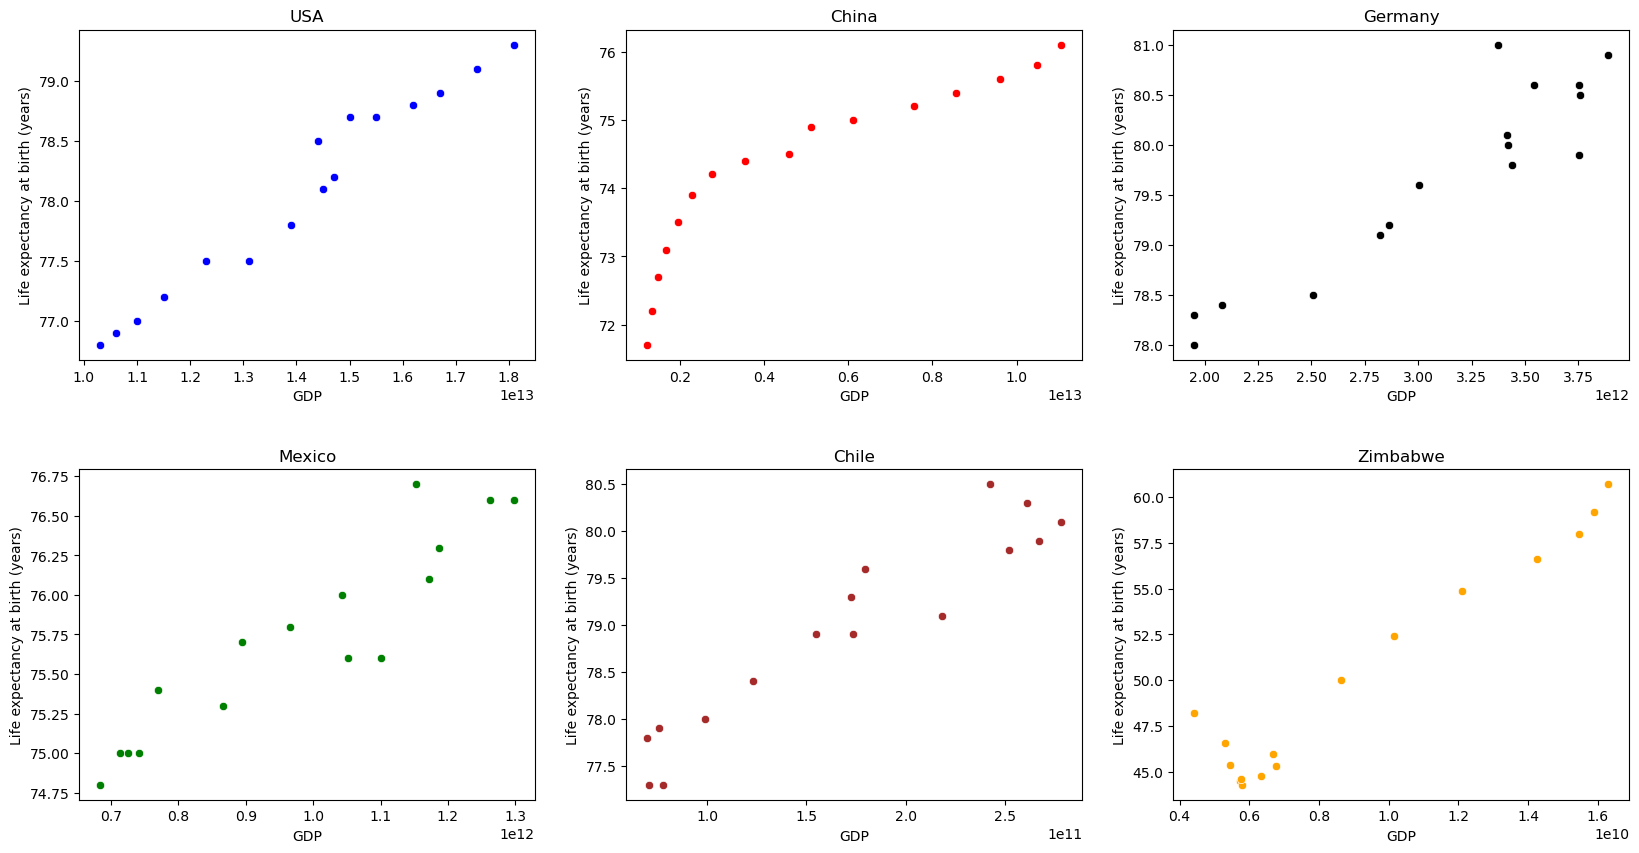

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1) #USA
sns.scatterplot(x=usa['GDP'], y=usa['LE'], color='blue') 
plt.ylabel('Life expectancy at birth (years)')
plt.title('USA')

plt.subplot(2,3,2) #China
sns.scatterplot(x=china['GDP'], y=china['LE'], color='red') 
plt.ylabel('Life expectancy at birth (years)')
plt.title('China')

plt.subplot(2,3,3) #Germany
sns.scatterplot(x=germany['GDP'], y=germany['LE'], color='black') 
plt.ylabel('Life expectancy at birth (years)')
plt.title('Germany')

plt.subplot(2,3,4) #Mexico
sns.scatterplot(x=mexico['GDP'], y=mexico['LE'], color='green') 
plt.ylabel('Life expectancy at birth (years)')
plt.title('Mexico')

plt.subplot(2,3,5) #Chile
sns.scatterplot(x=chile['GDP'], y=chile['LE'], color='brown') 
plt.ylabel('Life expectancy at birth (years)')
plt.title('Chile')

plt.subplot(2,3,6) #Zimbabwe
sns.scatterplot(x=zimbabwe['GDP'], y=zimbabwe['LE'], color='orange') 
plt.ylabel('Life expectancy at birth (years)')
plt.title('Zimbabwe')

plt.subplots_adjust(hspace=0.33)
plt.show()

Looking at these graphs, we see that there is a certain relationship between the two variables: the higher the GDP, the higher the life expectancy rate. This relationship is more linear in some countries, and less linear in others. Let's add a linear function of the relationship for each graph to illustrate this.

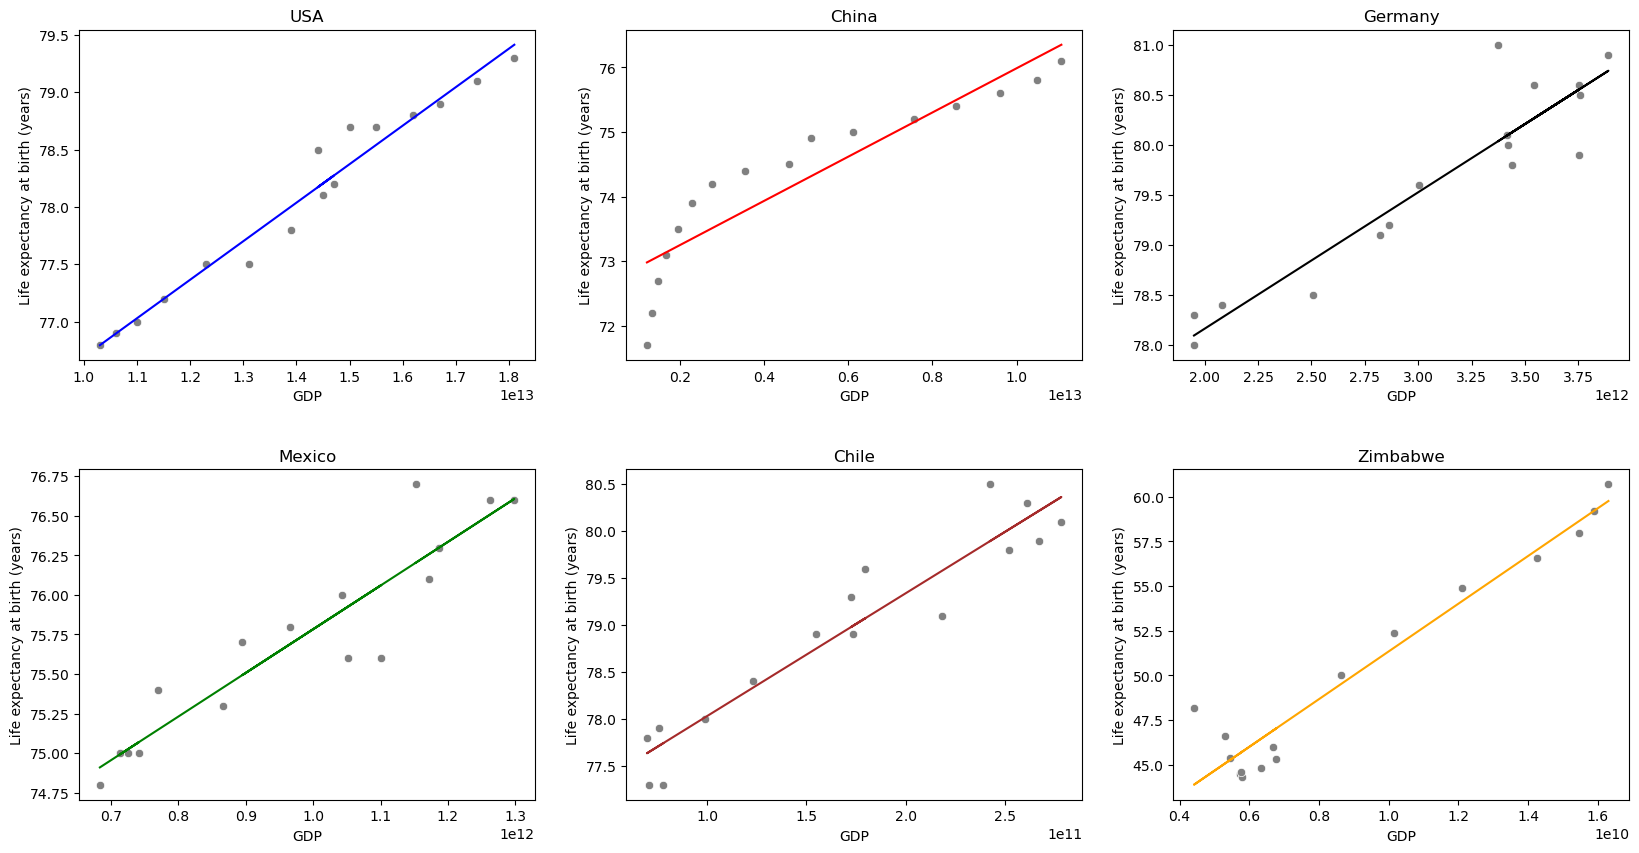

In [11]:
model_usa = sm.OLS.from_formula('LE ~ GDP', data = usa)
results_usa = model_usa.fit()

model_china = sm.OLS.from_formula('LE ~ GDP', data = china)
results_china = model_china.fit()

model_germany = sm.OLS.from_formula('LE ~ GDP', data = germany)
results_germany = model_germany.fit()

model_mexico = sm.OLS.from_formula('LE ~ GDP', data = mexico)
results_mexico = model_mexico.fit()

model_chile = sm.OLS.from_formula('LE ~ GDP', data = chile)
results_chile = model_chile.fit()

model_zimbabwe = sm.OLS.from_formula('LE ~ GDP', data = zimbabwe)
results_zimbabwe = model_zimbabwe.fit()

plt.figure(figsize=(20,10))

plt.subplot(2,3,1) #USA
sns.scatterplot(x=usa['GDP'], y=usa['LE'], color='grey')
plt.plot(usa['GDP'], results_usa.predict(usa), color='blue')
plt.ylabel('Life expectancy at birth (years)')
plt.title('USA')

plt.subplot(2,3,2) #China
sns.scatterplot(x=china['GDP'], y=china['LE'], color='grey')
plt.plot(china['GDP'], results_china.predict(china), color='red')
plt.ylabel('Life expectancy at birth (years)')
plt.title('China')

plt.subplot(2,3,3) #Germany
sns.scatterplot(x=germany['GDP'], y=germany['LE'], color='grey')
plt.plot(germany['GDP'], results_germany.predict(germany), color='black')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Germany')

plt.subplot(2,3,4) #Mexico
sns.scatterplot(x=mexico['GDP'], y=mexico['LE'], color='grey')
plt.plot(mexico['GDP'], results_mexico.predict(mexico), color='green')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Mexico')

plt.subplot(2,3,5) #Chile
sns.scatterplot(x=chile['GDP'], y=chile['LE'], color='grey')
plt.plot(chile['GDP'], results_chile.predict(chile), color='brown')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Chile')

plt.subplot(2,3,6) #Zimbabwe
sns.scatterplot(x=zimbabwe['GDP'], y=zimbabwe['LE'], color='grey')
plt.plot(zimbabwe['GDP'], results_zimbabwe.predict(zimbabwe), color='orange')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Zimbabwe')

plt.subplots_adjust(hspace=0.33)
plt.show()

The linear function does not perfectly describe the relationship. While we can see that many points for USA correspond to fitted values of the blue line, other countries are more likely to experience rather large deviations of observations from the modeled results. We can even see a kind of curved-pattern for China.

## Conclusions

We analyzed GDP and live expectancy values for 6 countries from 2000 to 2015. While GDP values are very different (we see a big gap between USA, China and other countries), life expectancy values are more similar between the countries (except for Zimbabwe). Speaking about the dynamics of these parameters, it should be noted that a fall in GDP in a certain year does not necessarily lead to a fall in life expectancy value and if there can be a correlation, it is delayed in time. Speaking about the direct relationship between these two indicators, it should be noted that it is not linear at the global level, but it is linear in some cases at the level of individual countries: the higher the GDP, the higher the life expectancy value. 

It is important to note that this relationship does not imply a direct dependence of one on the other, but rather an indirect one. If a country's GDP were the main factor in the growth of life expectancy value, we would not have observations with low GDP and high life expectancy at the global level. It is necessary to keep in mind that there are many factors that can more directly influence life expectancy value: the level of health care, the arrangement of the welfare system, including the availability of state benefits and social projects, working conditions in the country, environmental pollution, cultural specifics of the population's lifestyle (nutrition, physical activity, hygiene) etc.